In [28]:
import numpy as np
import astropy
import matplotlib.pyplot as plt
%matplotlib inline

from astropy.io import fits, ascii
import matplotlib.colors as colors
import pandas as pd
from scipy.ndimage import median_filter

In [29]:
flat_on_f = 'C:\\Users\\bazar\\Desktop\\Galaxy\\310IMG01_flaton_JHK.fits'
flat_off_f = 'C:\\Users\\bazar\\Desktop\\Galaxy\\310IMG06_flatoff_JHK.fits'

In [30]:
hdu_list = fits.open(flat_on_f)
flat_on = hdu_list[0].data

hdu_list = fits.open(flat_off_f)
flat_off = hdu_list[0].data

In [31]:
flat_on = np.asarray([[float(y) for y in x] for x in flat_on])
flat_off = np.asarray([[float(y) for y in x] for x in flat_off])

In [32]:
flat = flat_on - flat_off

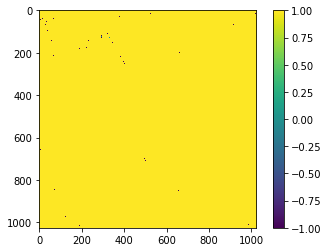

In [33]:
plt.imshow(flat, interpolation = 'nearest', vmin=-1, vmax=1)
plt.colorbar()

Test

In [34]:
for column in range(flat.shape[1]):
    flat[:,column] = flat[:,column] / np.median(flat[300:700,column])

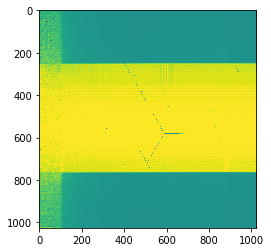

In [35]:
plt.imshow(flat, interpolation = 'nearest', vmin=-1, vmax=1)

In [36]:
#esk_a = 'C:\\Users\\bazar\\Desktop\\AS441_Lab3_2\\20200315.020.fits'
#esk_b = 'C:\\Users\\bazar\\Desktop\\AS441_Lab3_2\\20200315.021.fits'

In [37]:
gala = 'C:\\Users\\bazar\\Desktop\\AS441_Lab3_1\\20200309\\20200309.024.fits'
galb = 'C:\\Users\\bazar\\Desktop\\AS441_Lab3_1\\20200309\\20200309.025.fits'

In [38]:
#hdu_list = fits.open(esk_a)
#esk_a = hdu_list[0].data

#hdu_list = fits.open(esk_b)
#esk_b = hdu_list[0].data
hdu_list = fits.open(gala)
gala = hdu_list[0].data

hdu_list = fits.open(galb)
galb = hdu_list[0].data

In [39]:
#esk_a = np.asarray([[float(y) for y in x] for x in esk_a])
#esk_b = np.asarray([[float(y) for y in x] for x in esk_b])
gala = np.asarray([[float(y) for y in x] for x in gala])
galb = np.asarray([[float(y) for y in x] for x in galb])

In [40]:
#esk_ab = esk_a-esk_b
gal_ab = gala-galb

In [41]:
#esk = esk_ab/flat
gal = gal_ab/flat

C:\Users\bazar\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in true_divide
  
C:\Users\bazar\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  


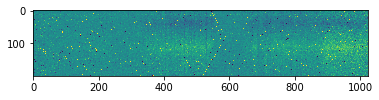

In [42]:
imgplot = plt.imshow(gal[:][500:700], interpolation = 'nearest', vmin=-100, vmax=100)

In [43]:
from scipy.ndimage import median_filter
#img[img > 4000] = 4001
#img[img < -4000] = -4001
no_nans = gal[np.where(np.isnan(gal))] = 4001
blurred = median_filter(gal, size=2)
difference = np.abs(gal - blurred)
threshold = 10
print(threshold)

hot_pixels = np.nonzero((np.abs(difference[1:-1,1:-1])>threshold) )
hot_pixels = np.array(hot_pixels) + 1 #because we ignored the first row and first column

gal_fix = np.copy(gal) #This is the image with the hot pixels removed
for y,x in zip(hot_pixels[0],hot_pixels[1]):
    gal_fix[y,x]=blurred[y,x]

C:\Users\bazar\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in subtract
  


10


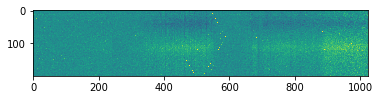

In [44]:
imgplot = plt.imshow(gal_fix[:][500:700], interpolation = 'nearest', vmin=-100, vmax=100)

1024


(180.0, 1000.0)

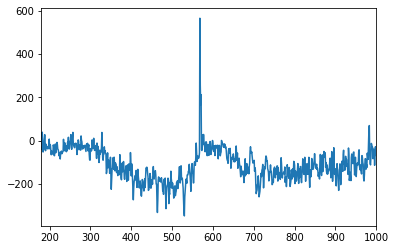

In [45]:
pos_spec = gal_fix[:][540:550]
pos_spec1d = np.sum(pos_spec,axis=0)
print(len(pos_spec1d))

plt.plot(pos_spec1d)
plt.xlim(180.0,1000.0)
#plt.ylim(0,500)

1024


(180.0, 1000.0)

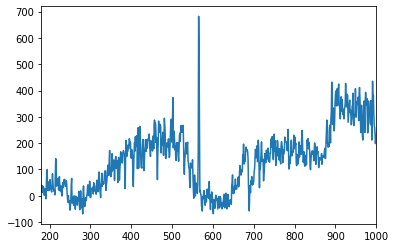

In [46]:
neg_spec = gal_fix[:][618:628]
neg_spec1d = np.sum(neg_spec,axis=0)
print(len(neg_spec1d))

plt.plot(neg_spec1d)
plt.xlim(180.0,1000.0)
#plt.ylim(-500,0)

In [57]:
def quad(px):
    wl = 1.179911 + 0.0009338844*px + 3.568284e-7*px**2
    return wl
ind = range(len(spec1d))

wl_lst = []

for i in ind:
    wl_lst.append(quad(i))

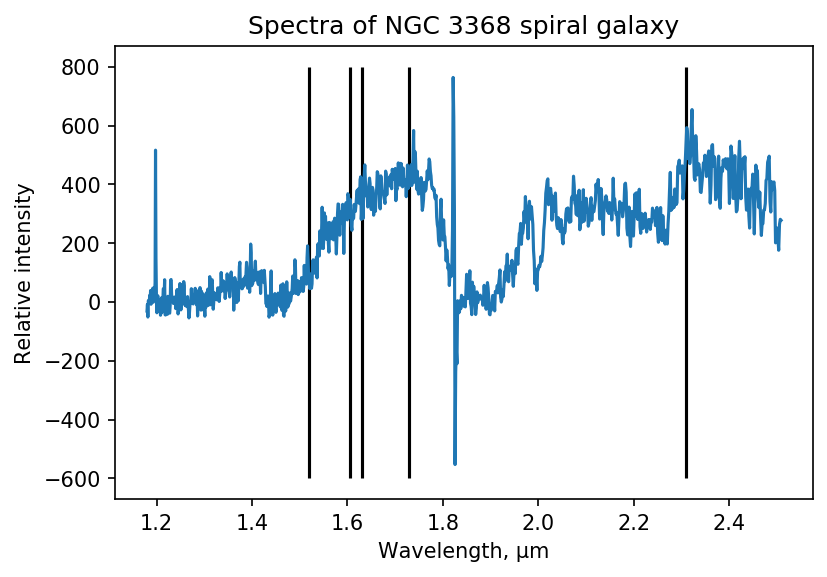

In [65]:
plt.plot(wl_lst, spec1d)
plt.rcParams['figure.dpi'] = 150
#plt.xlim(2.2,2.5)
plt.title('Spectra of NGC 3368 spiral galaxy')
plt.xlabel('Wavelength, μm')
plt.ylabel('Relative intensity')
plt.savefig('C:\\Users\\bazar\\Desktop\\Galaxy.png')
#plt.vlines(1.52, -600, 800)
#plt.vlines(1.605, -600, 800)
#plt.vlines(1.63, -600, 800)
#plt.vlines(2.31, -600, 800)
#plt.vlines(1.73, -600, 800)

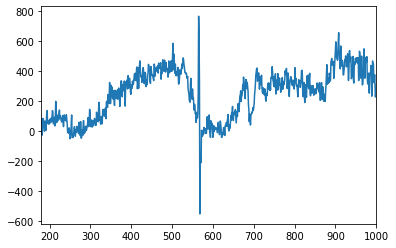

In [47]:
spec1d =-( pos_spec1d - neg_spec1d)
plt.plot(spec1d)
plt.xlim(180.0,1000.0)
plt.rcParams['figure.dpi'] = 150

In [48]:
# Ar data
ar_on_f = 'C:\\Users\\bazar\\Desktop\\Galaxy\\310IMG14_argonon_JHK.fits'
ar_off_f = 'C:\\Users\\bazar\\Desktop\\Galaxy\\310IMG18_argonoff_JHK.fits'
ar_on_hdu = fits.open(ar_on_f)
ar_off_hdu = fits.open(ar_off_f)
ar = (ar_on_hdu[0].data*1.0 - ar_off_hdu[0].data*1.0)/flat


C:\Users\bazar\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in true_divide
  
C:\Users\bazar\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in true_divide
  


In [49]:
no_nans_ar = ar[np.where(np.isnan(ar))] = 4001
blurred = median_filter(ar, size=2)
difference = np.abs(ar - blurred)
threshold = 10
print(threshold)

hot_pixels = np.nonzero((np.abs(difference[1:-1,1:-1])>threshold) )
hot_pixels = np.array(hot_pixels) + 1 #because we ignored the first row and first column

ar_fix = np.copy(ar) #This is the image with the hot pixels removed
for y,x in zip(hot_pixels[0],hot_pixels[1]):
    ar_fix[y,x]=blurred[y,x]

C:\Users\bazar\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in subtract
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\bazar\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in greater
  import sys


10


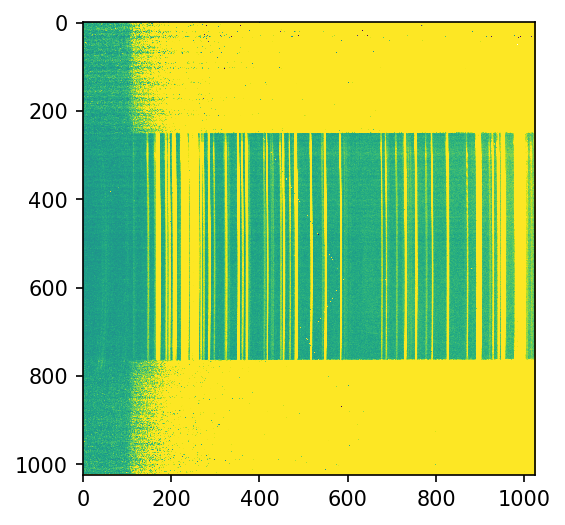

In [50]:
imgplot = plt.imshow(ar_fix[:][:], interpolation = 'nearest', vmin=-100, vmax=100)

1024


(180.0, 1000.0)

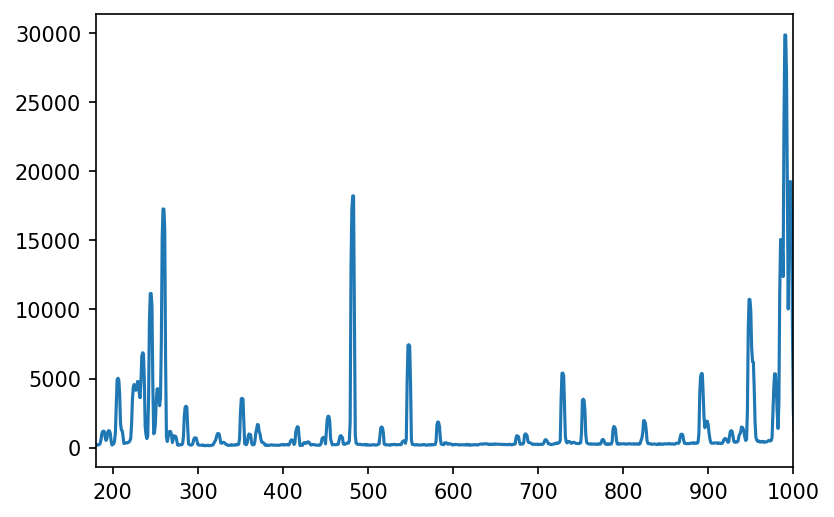

In [51]:
pos_spec_ar_fix = ar_fix[:][540:550]
pos_spec1d_ar_fix = np.sum(pos_spec_ar_fix,axis=0)
print(len(pos_spec1d_ar_fix))

plt.plot(pos_spec1d_ar_fix)
plt.xlim(180.0,1000.0)
#plt.ylim(0,500)

(180.0, 1000.0)

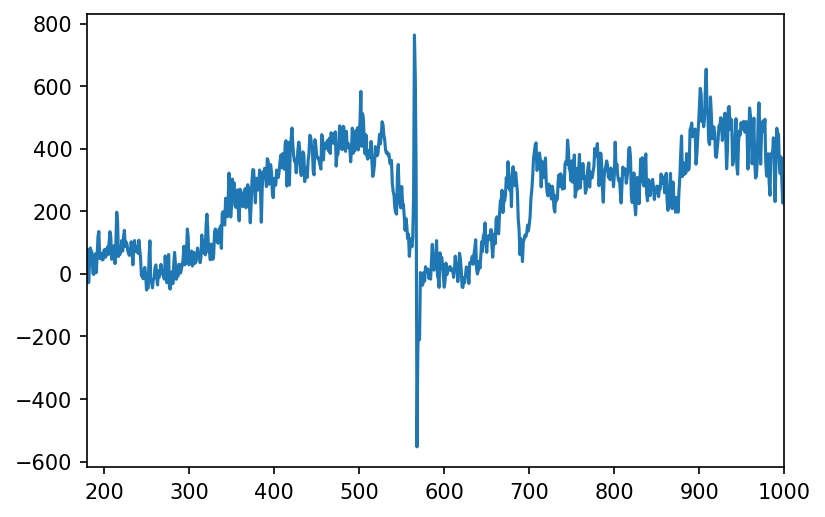

In [52]:
spec1d = -(pos_spec1d - neg_spec1d)
plt.plot(spec1d)
plt.xlim(180.0,1000.0)

In [53]:
path = 'C:\\Users\\bazar\\Downloads\\Ar_lines.csv'

In [54]:
df = pd.read_csv(path)

In [55]:
ar_lines = ascii.read(path)
strength = np.array(ar_lines['ï»¿strength'])
wl = np.array(ar_lines['wavelength'])

In [56]:
for i in range(len(wl1)):
    if len(wl[i]) > 10:
        wl[i] = wl[i][6:]

NameError: name 'wl1' is not defined

In [ ]:
wl = [float(x)/10000.0 for x in wl]

In [ ]:
plt.plot(wl,strength)

In [ ]:
pos_spec_ar_fix = ar_fix[:][540:550]
pos_spec1d_ar_fix = np.sum(pos_spec_ar_fix,axis=0)
print(len(pos_spec1d_ar_fix))

plt.plot(pos_spec1d_ar_fix)
plt.xlim(180.0,1000.0)
#plt.ylim(0,500)

In [ ]:
spec1d = pos_spec1d - neg_spec1d
plt.plot(spec1d)
plt.xlim(180.0,1000.0)

In [ ]:
plt.plot(pos_spec1d_ar_fix)
plt.xlim(0.,1000.0)
plt.ylim(-5000.,25000)

In [ ]:
plt.scatter(wl,strength)
plt.xlim(1, 2.5)
plt.ylim(0, 50)